### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics Using Python

## Demonstration: Fit.ly case study

Fit.ly, a fitness tracking device company, is upgrading their app to provide users with a leader board. The leader board will show aggregated data and allow users to measure their own performance against the user base. In these early stages of development, the company is looking at various possible visualisations that can be used on the leader board.

Note: You will be using this demonstration file for 4.1.6 (steps 1-4) , 4.1.13 (steps 5-8 ) and 4.2.5 (steps 9-10).

Let’s explore what’s possible to visualise for the Fit.ly platform! 

# 4.1.6 Barplots with Seaborn

## 1. Prepare your workstation 

In [1]:
# Import Matplotlib, Seaborn, and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file.
fitness = pd.read_csv('daily_activity.csv')

# View the DataFrame.
print(fitness.shape)
print(fitness.dtypes)
print(fitness.columns)
fitness.head()

(940, 15)
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## 2. Create a simple barplot

In [2]:
# Create a DataFrame with specified columns.
distance = fitness[['Id', 'ActivityDate', 'VeryActiveDistance',
                   'ModeratelyActiveDistance', 'LightActiveDistance',
                   'SedentaryActiveDistance']]

# View the DataFrame.
print(distance.head())

           Id ActivityDate  VeryActiveDistance  ModeratelyActiveDistance  \
0  1503960366    4/12/2016                1.88                      0.55   
1  1503960366    4/13/2016                1.57                      0.69   
2  1503960366    4/14/2016                2.44                      0.40   
3  1503960366    4/15/2016                2.14                      1.26   
4  1503960366    4/16/2016                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  
0                 6.06                      0.0  
1                 4.71                      0.0  
2                 3.91                      0.0  
3                 2.83                      0.0  
4                 5.04                      0.0  


In [3]:
# Reshape the DataFrame from wide to long. 
distance_long = distance.melt(id_vars=['Id', 'ActivityDate'], 
                              var_name='DistanceType', value_name='Distance')

# View the DataFrame.
print(distance_long.head())

           Id ActivityDate        DistanceType  Distance
0  1503960366    4/12/2016  VeryActiveDistance      1.88
1  1503960366    4/13/2016  VeryActiveDistance      1.57
2  1503960366    4/14/2016  VeryActiveDistance      2.44
3  1503960366    4/15/2016  VeryActiveDistance      2.14
4  1503960366    4/16/2016  VeryActiveDistance      2.71


<AxesSubplot:xlabel='DistanceType', ylabel='Distance'>

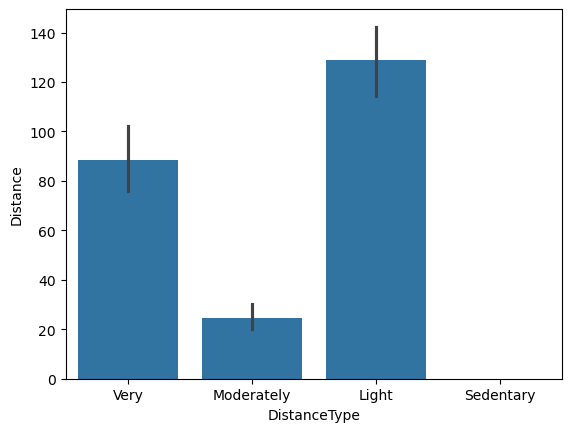

In [4]:
# Format values in the columns.
distance_long['DistanceType'] = distance_long['DistanceType'].str.replace('ActiveDistance', "")


# Add a filter to identify logged-in user.
individual = distance_long[distance_long['Id'] == 1503960366]


# Create a barplot.
sns.barplot(x='DistanceType', y='Distance', estimator=sum, data=individual)

## 3. Create a stacked barplot

<AxesSubplot:>

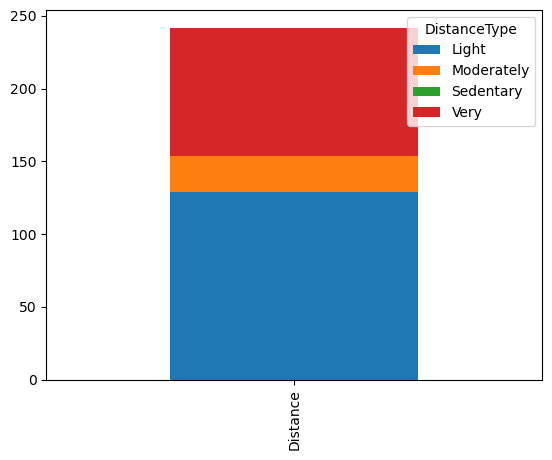

In [5]:
# Stacked barplots with Pandas.
individual.groupby('DistanceType')[['Distance']].sum().T.plot.bar(stacked=True)

## 4. Create a grouped barplot

<AxesSubplot:xlabel='DistanceType', ylabel='Distance'>

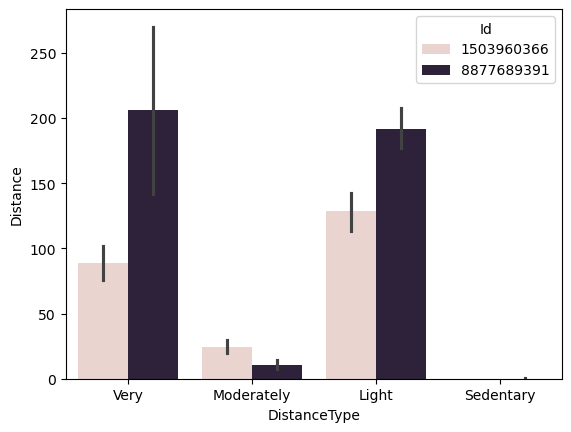

In [6]:
# Pair the data of two individuals.
pair = distance_long[distance_long['Id'].isin([8877689391, 1503960366])]

# Create a grouped barplot.
sns.barplot(x='DistanceType', y='Distance', hue='Id', estimator=sum, data=pair)

# 4.1.13 Lineplots with Seaborn

## 5. Create a lineplot

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

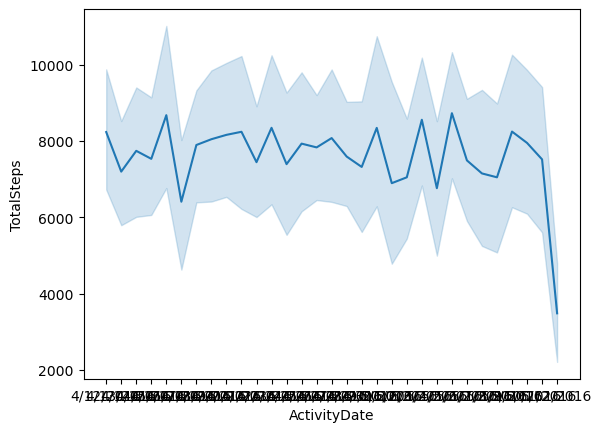

In [7]:
# Create a simple lineplot.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=fitness)

## 6. Lineplots: Confidence interval

  ActivityDate  TotalSteps
0   2016-04-12      271816
1   2016-04-13      237558
2   2016-04-14      255538
3   2016-04-15      248617
4   2016-04-16      277733


<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

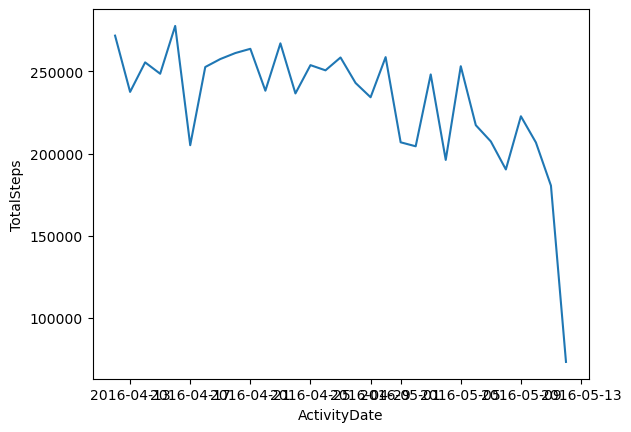

In [8]:
# Create a time-series.
steps_time_series = fitness\
 .groupby('ActivityDate')[['TotalSteps']]\
 .sum()\
 .reset_index()\
 .copy()


# Format data with datetime() function.
steps_time_series['ActivityDate'] = pd.to_datetime(steps_time_series['ActivityDate'])

# View the output.
print(steps_time_series.head())


# Create a lineplot without confidence level shade.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=steps_time_series)

## 7. Remove confidence interval

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

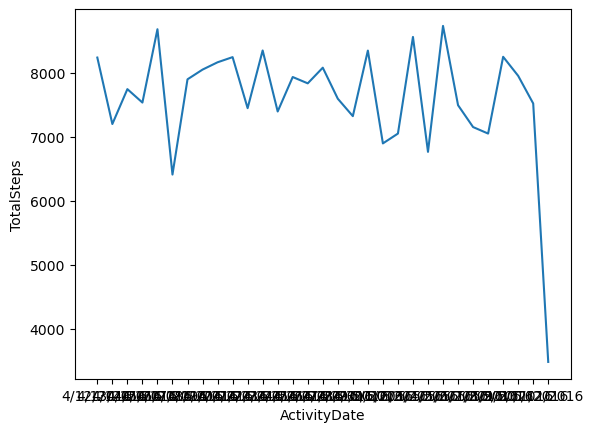

In [9]:
# Create a simple lineplot without confidence interval.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=fitness, errorbar=None)

## 8. Lineplots:Improve quality

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

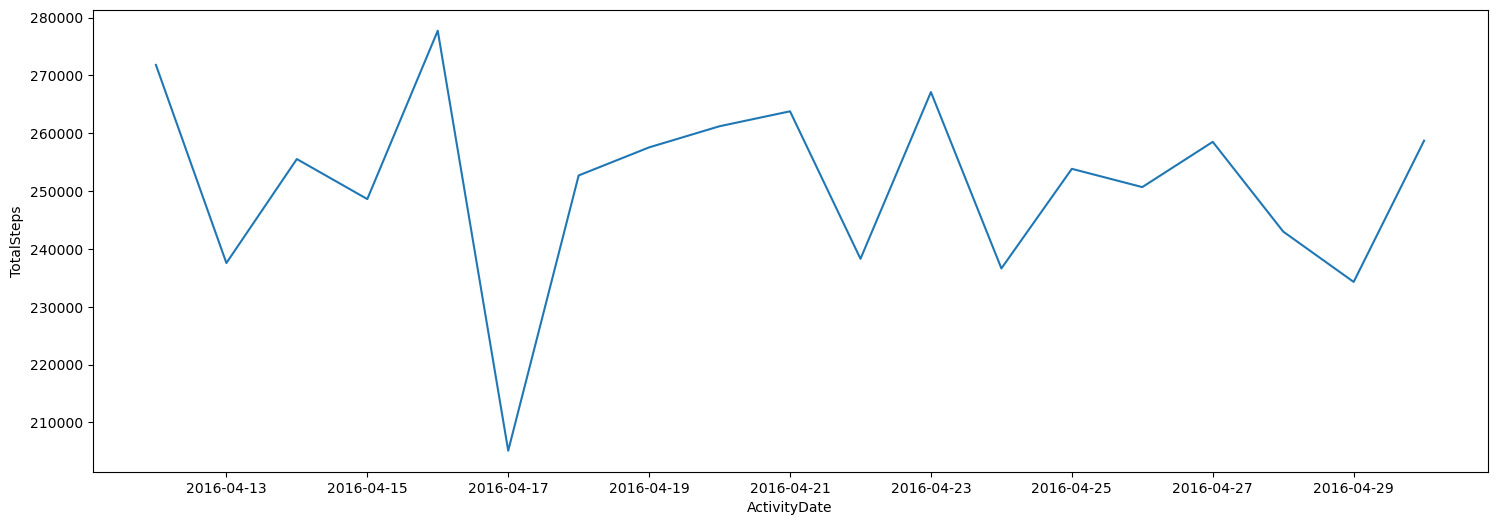

In [10]:
# Create plot size.
plt.figure(figsize=(18, 6))

# Create a lineplot with specific date.
sns.lineplot(x='ActivityDate', y='TotalSteps',
             data=steps_time_series[steps_time_series['ActivityDate'] < '2016-05-01'])

# 4.2.5 Highlighting and adding annotations

## 9. Highlighting and adding annotations to a scatterplot

<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

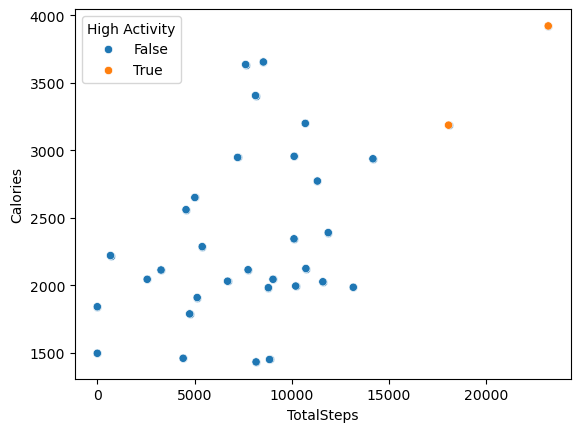

In [11]:
# Define single_day as variable.
single_day = fitness[fitness['ActivityDate'] == '4/12/2016']

# Create a scatterplot.
sns.scatterplot(x='TotalSteps', y='Calories', data=single_day)

# Make a copy of original data.
single_day_highlights = single_day.copy()

# Set a criteria as true or false.
single_day_highlights['High Activity'] = single_day_highlights['TotalSteps'] > 15000

# Create new scatterplot.
sns.scatterplot(x='TotalSteps', y='Calories', 
                hue='High Activity', data=single_day_highlights)

## 10. Highlighting and adding annotations to a lineplot

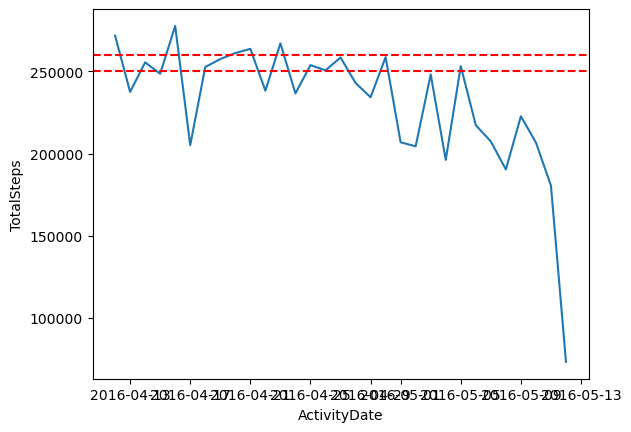

In [12]:
# Define data = steps_time_series.
steps_time_series = fitness\
 .groupby('ActivityDate')[['TotalSteps']]\
 .sum()\
 .reset_index()\
 .copy()

# Create a variable.
steps_time_series['ActivityDate'] = pd.to_datetime(steps_time_series['ActivityDate'])

# Create a lineplot.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=steps_time_series)

# Add annotation lines.
plt.axhline(y=250000, color='r', linestyle='--')
plt.axhline(y=260000, color='r', linestyle='--')